In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Missing Values in Columns:
HDB BRANCH NAME                           1
HDB BRANCH STATE                        854
MIDDLE NAME                            7145
LAST NAME                               681
Cibil Score                            4297
DEALER NAME                               4
TOTAL ASSET COST                       5108
ASSET CTG                              5108
MARITAL STATUS                         4894
ADDRESS TYPE                           3312
EMPLOY CONSTITUTION                    4998
EMPLOYER NAME                          5010
EMPLOYER TYPE                          4998
Pan Name                               1053
vpa                                    2787
upi_name                               2789
Phone Social Premium.a23games          9999
Phone Social Premium.amazon            1916
Phone Social Premium.byjus             1948
Phone Social Premium.flipkart          1832
Phone Social Premium.housing           1776
Phone Social Premium.indiamart         1775
Phone

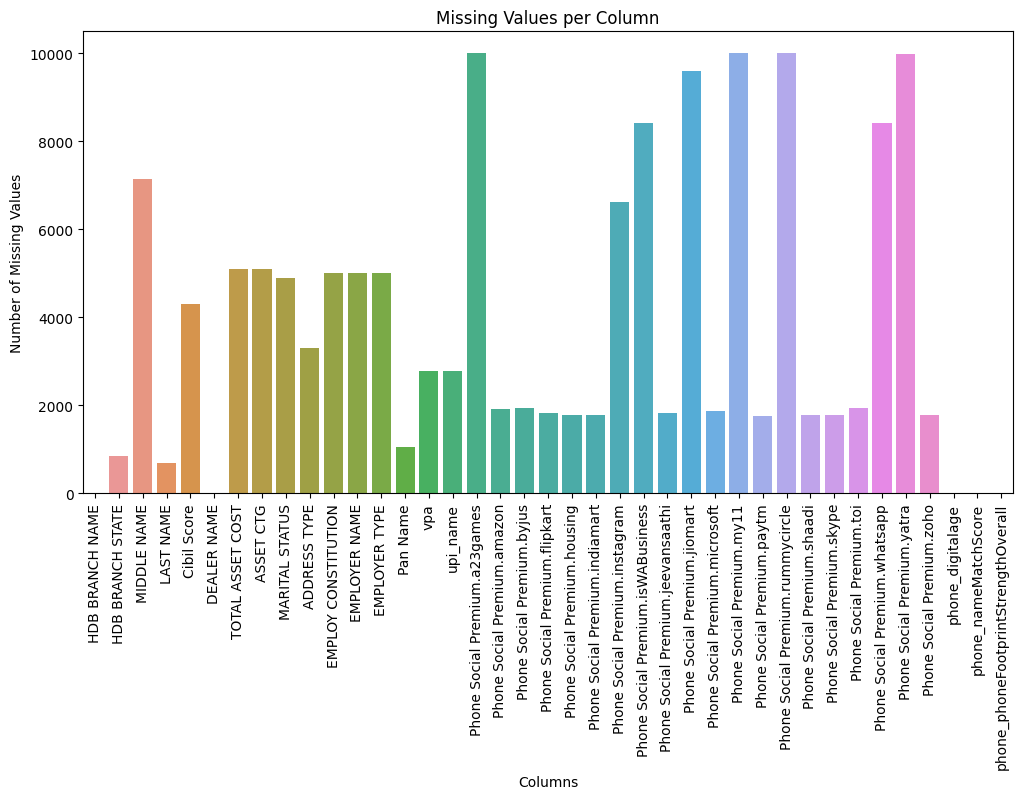

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('/kaggle/input/dataset/Assignment_Train.csv')

# Calculate the number of missing values per column
missing_values = train_data.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Print the columns with missing values and their counts
print("Missing Values in Columns:")
print(missing_values)

# Plot missing values as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


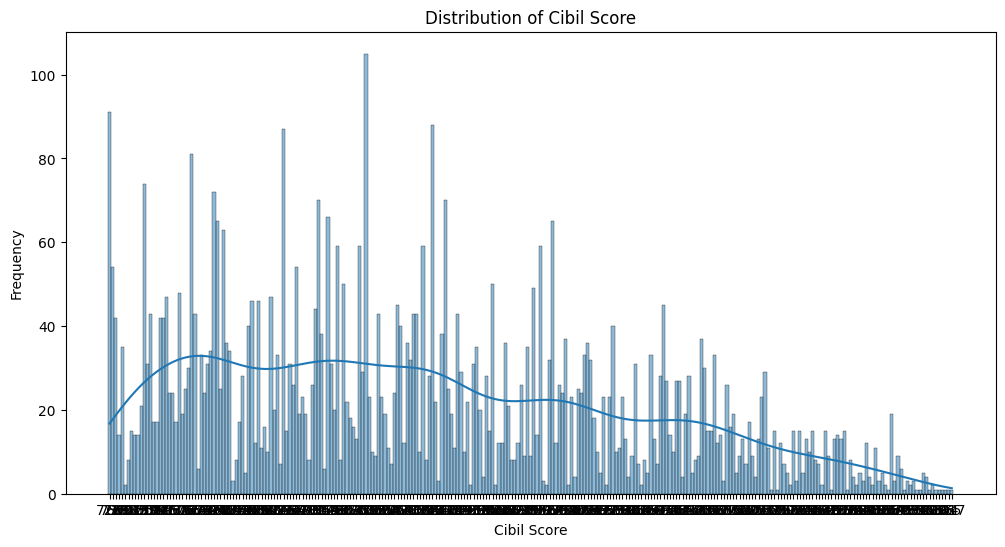

In [14]:
# Check if 'Cibil Score' column exists
if 'Cibil Score' in train_data.columns:
    # Plot distribution of Cibil Score
    plt.figure(figsize=(12, 6))
    sns.histplot(train_data['Cibil Score'], kde=True)
    plt.title('Distribution of Cibil Score')
    plt.xlabel('Cibil Score')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'Cibil Score' column not found in the dataset.")


In [20]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('/kaggle/input/dataset/Assignment_Train.csv')

# Filter numeric columns for variance calculation
numeric_cols = train_data.select_dtypes(include=['number']).columns

# Calculate the variance of each numeric column
variances = train_data[numeric_cols].var()

# Filter columns with low variance
low_variance_cols = variances[variances < 0.01].index.tolist()
print("\nLow Variance Columns:")
print(low_variance_cols)

# Filter columns with high variance
high_variance_cols = variances[variances >= 0.01].index.tolist()
print("\nHigh Variance Columns:")
print(high_variance_cols)



Low Variance Columns:
['Phone Social Premium.my11', 'Phone Social Premium.yatra', 'Phone Social Premium.zoho']

High Variance Columns:
['DEALER ID', 'mobile', 'TOTAL ASSET COST', 'ASSET MODEL NO', 'APPLIED AMOUNT', 'DOB', 'AGE', 'Phone Social Premium.amazon', 'Phone Social Premium.byjus', 'Phone Social Premium.flipkart', 'Phone Social Premium.housing', 'Phone Social Premium.indiamart', 'Phone Social Premium.instagram', 'Phone Social Premium.isWABusiness', 'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart', 'Phone Social Premium.microsoft', 'Phone Social Premium.paytm', 'Phone Social Premium.shaadi', 'Phone Social Premium.skype', 'Phone Social Premium.toi', 'Phone Social Premium.whatsapp', 'phone_digitalage', 'phone_nameMatchScore']


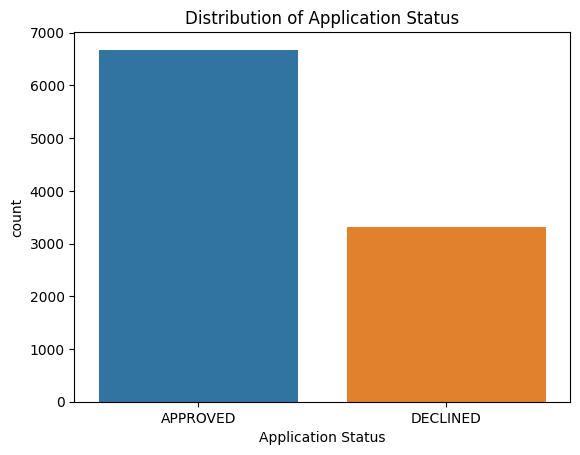

Best parameters for Logistic Regression:  {'C': 0.1, 'class_weight': None, 'solver': 'lbfgs'}
Logistic Regression Performance:
              precision    recall  f1-score   support

    APPROVED       0.86      0.90      0.88      1327
    DECLINED       0.78      0.72      0.75       673

    accuracy                           0.84      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.84      0.84      0.84      2000

Best parameters for Random Forest:  {'n_estimators': 300, 'max_depth': 30, 'class_weight': 'balanced'}
Random Forest Performance:
              precision    recall  f1-score   support

    APPROVED       0.99      0.75      0.85      1327
    DECLINED       0.66      0.98      0.79       673

    accuracy                           0.83      2000
   macro avg       0.83      0.86      0.82      2000
weighted avg       0.88      0.83      0.83      2000

XGBoost Performance:
              precision    recall  f1-score   support

    APPROVED 

In [1]:
from sklearn.model_selection import RandomizedSearchCV
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Load the training and test datasets
train_data = pd.read_csv('/kaggle/input/dataset/Assignment_Train.csv')
test_data = pd.read_csv('/kaggle/input/dataset/Assignment_Test.csv')

# Data Preprocessing

# Drop irrelevant columns
cols_to_drop = ['MOBILE VERIFICATION','mobile','DOB','FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile', 'Personal Email Address',                   'Phone Social Premium.a23games', 'Phone Social Premium.amazon', 'Phone Social Premium.byjus', 
                   'Phone Social Premium.flipkart', 'Phone Social Premium.housing', 
                   'Phone Social Premium.indiamart', 'Phone Social Premium.instagram', 
                   'Phone Social Premium.isWABusiness', 'Phone Social Premium.jiomart', 
                   'Phone Social Premium.my11', 'Phone Social Premium.paytm', 
                   'Phone Social Premium.rummycircle', 'Phone Social Premium.shaadi', 
                   'Phone Social Premium.skype', 'Phone Social Premium.toi', 
                   'Phone Social Premium.whatsapp', 'Phone Social Premium.yatra', 
                   'Phone Social Premium.zoho']
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

# Handle missing values only for numeric columns
numeric_cols = train_data.select_dtypes(include=['number']).columns
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].median())
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].median())

# Handling Categorical data with One-Hot Encoding
cat_cols = train_data.select_dtypes(include=['object']).columns.drop('Application Status')
train_data = pd.get_dummies(train_data, columns=cat_cols)
test_data = pd.get_dummies(test_data, columns=cat_cols)

# Align columns of test data with train data (this will add missing columns in test data with 0)
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)

# Drop the target column ('Application Status') from test data if it's still present
if 'Application Status' in test_data.columns:
    test_data = test_data.drop(columns=['Application Status'])

# Ensure Application Status is treated as categorical for plotting
sns.countplot(x='Application Status', data=train_data)
plt.title('Distribution of Application Status')
plt.show()

# Splitting the data into features and target
X = train_data.drop(columns=['Application Status'])
y = train_data['Application Status']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_data = scaler.transform(test_data)  # Ensure the same scaler is applied to the test data

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
lr_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced', None]
}

# Initialize GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=lr_param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)
print("Best parameters for Logistic Regression: ", lr_grid_search.best_params_)
best_lr_model = lr_grid_search.best_estimator_

# Model 1: Logistic Regression
y_pred_lr = best_lr_model.predict(X_val)
print("Logistic Regression Performance:")
print(classification_report(y_val, y_pred_lr))

# Hyperparameter Tuning for Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'class_weight': ['balanced', None]
}

# Initialize RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=rf_param_dist, n_iter=10, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
print("Best parameters for Random Forest: ", rf_random_search.best_params_)
best_rf_model = rf_random_search.best_estimator_

# Model 2: Random Forest
y_pred_rf = best_rf_model.predict(X_val)
print("Random Forest Performance:")
print(classification_report(y_val, y_pred_rf))

# Mapping the target labels to numeric values
y_train_numeric = y_train.map({'APPROVED': 1, 'DECLINED': 0})
y_val_numeric = y_val.map({'APPROVED': 1, 'DECLINED': 0})

# XGBoost with the best parameters found
best_xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=len(y_train_numeric) / sum(y_train_numeric)
)

best_xgb_model.fit(X_train, y_train_numeric)
y_pred_xgb = best_xgb_model.predict(X_val)
# Convert predictions back to the original labels
y_pred_xgb_labels = pd.Series(y_pred_xgb).map({1: 'APPROVED', 0: 'DECLINED'})
print("XGBoost Performance:")
print(classification_report(y_val, y_pred_xgb_labels))

# ROC AUC Score for XGBoost
print(f'XGBoost AUC: {roc_auc_score(y_val_numeric, best_xgb_model.predict_proba(X_val)[:, 1])}')

In [2]:
# Reload test data with UID
test_data_full = pd.read_csv('/kaggle/input/dataset/Assignment_Test.csv')

# Separate UID before dropping columns and encoding
test_data_uid = test_data_full[['UID']]
test_data = test_data_full.drop(columns=cols_to_drop)

# Handle missing values
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].median())

# Handle categorical data
test_data = pd.get_dummies(test_data)

# Align columns of test data with train data (this will add missing columns in test data with 0)
test_data, _ = test_data.align(train_data.drop(columns=['Application Status']), join='left', axis=1, fill_value=0)

# Re-add UID column to the test data
test_data = pd.concat([test_data_uid, test_data], axis=1)


In [3]:
# Extract UID from the test data
test_data_uid = test_data_full[['UID']]

# Drop irrelevant columns and handle missing values
test_data = test_data_full.drop(columns=cols_to_drop)
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].median())

# One-Hot Encode categorical columns
test_data = pd.get_dummies(test_data)

# Align test data columns with training data
test_data, _ = test_data.align(train_data.drop(columns=['Application Status']), join='left', axis=1, fill_value=0)

# Re-add UID column to the test data
test_data = pd.concat([test_data_uid, test_data], axis=1)


In [4]:
# Load the training data to get the feature names used during training
train_data_features = pd.read_csv('/kaggle/input/dataset/Assignment_Train.csv')  # Adjust the file path as needed

# Extract feature columns used in training
feature_columns = train_data_features.columns.difference(['Application Status'])

# Drop the UID column from test data and ensure consistent columns
test_data_features = test_data.drop(columns=['UID'])

# Align the columns with training data columns
test_data_features = test_data_features.reindex(columns=feature_columns, fill_value=0)


In [5]:
# Load training data
train_data = pd.read_csv('/kaggle/input/dataset/Assignment_Train.csv')  # Adjust the file path as needed

# Extract features used during training
feature_columns = train_data.drop(columns=['Application Status']).columns

In [6]:
# Load test data
test_data = pd.read_csv('/kaggle/input/dataset/Assignment_Test.csv')  # Adjust the file path as needed

# Separate UID column from features
test_data_features = test_data.drop(columns=['UID'])

# Ensure the test data columns match the training data columns
test_data_features = test_data_features.reindex(columns=feature_columns, fill_value=0)


In [7]:
# Assuming you have access to the training data columns
train_feature_columns = scaler.feature_names_in_

# Check the columns in the test data
test_feature_columns = test_data_features.columns

In [8]:
# Ensure test data has the same columns as training data
test_data_features = test_data_features.reindex(columns=train_feature_columns, fill_value=0)


In [9]:
# Feature scaling for test data
test_data_scaled = scaler.transform(test_data_features)

In [10]:
# Feature scaling for test data
test_data_scaled = scaler.transform(test_data_features)


In [11]:
# Predict using the best model
test_predictions = best_xgb_model.predict(test_data_scaled)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'UID': test_data['UID'],  # Include 'UID' correctly
    'Application Status': pd.Series(test_predictions).map({1: 'APPROVED', 0: 'DECLINED'})
})

# Save the predictions to a CSV file
submission.to_csv('predictions.csv', index=False)
